


________________________________________

Working with $R^{+}$$\left( D_{5}, \  0\right)$

<h1><center><strong>Weights</strong></center></h1>

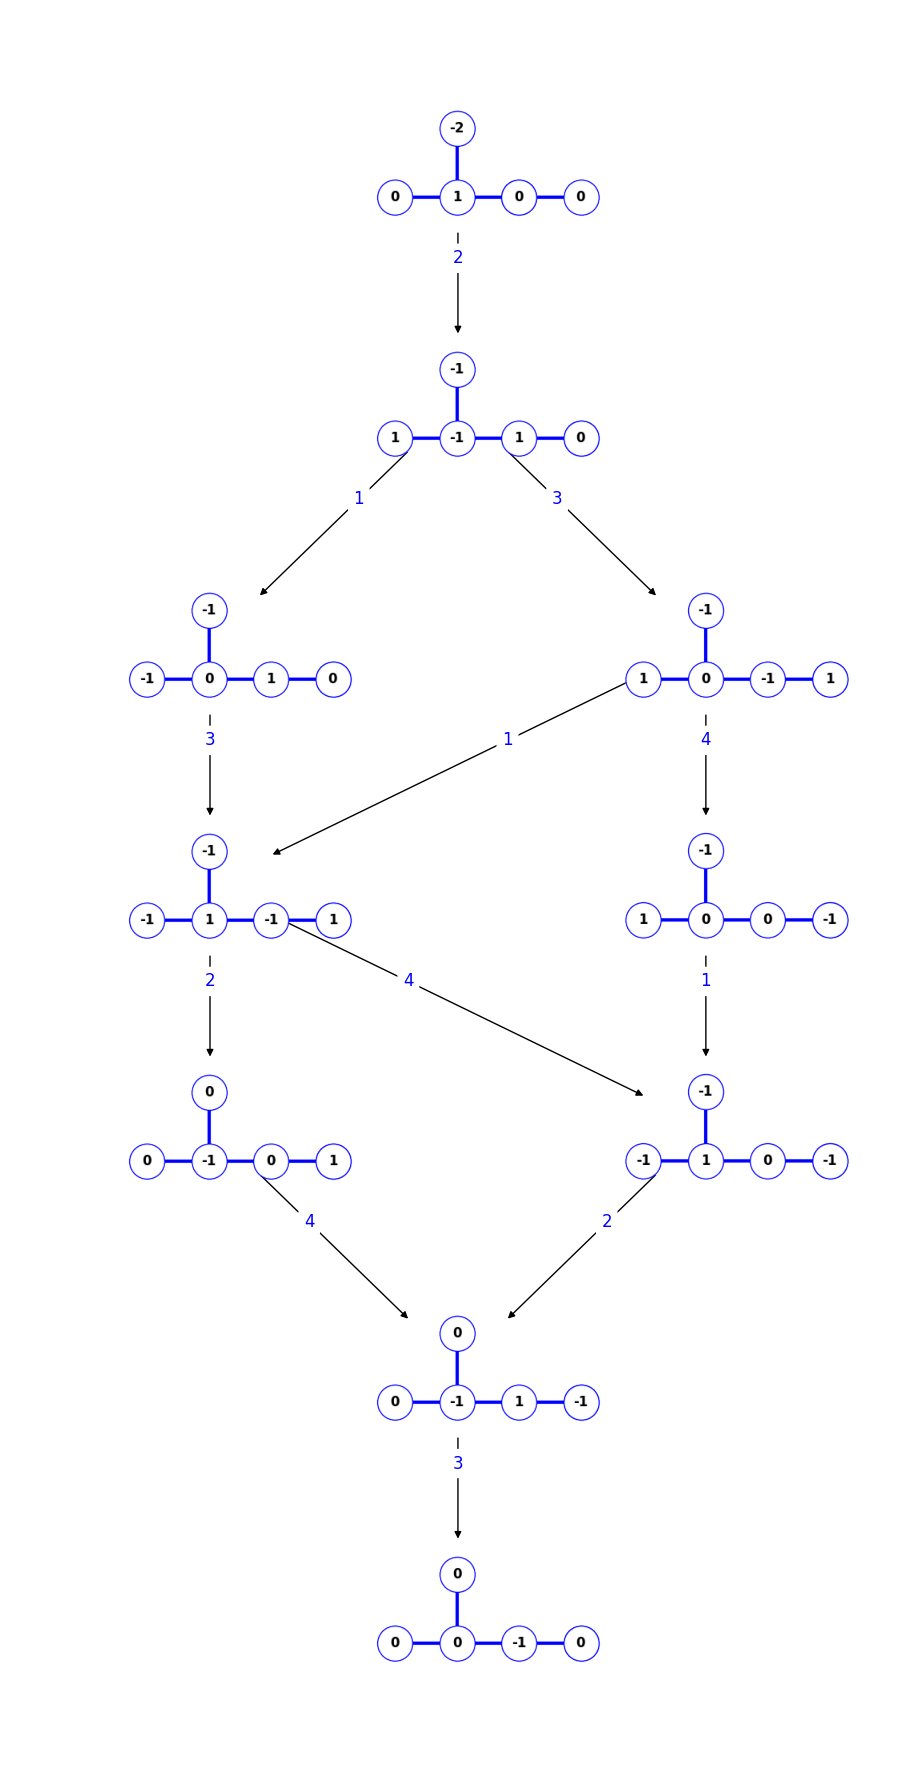

<h1><center><strong>Population</strong></center></h1>

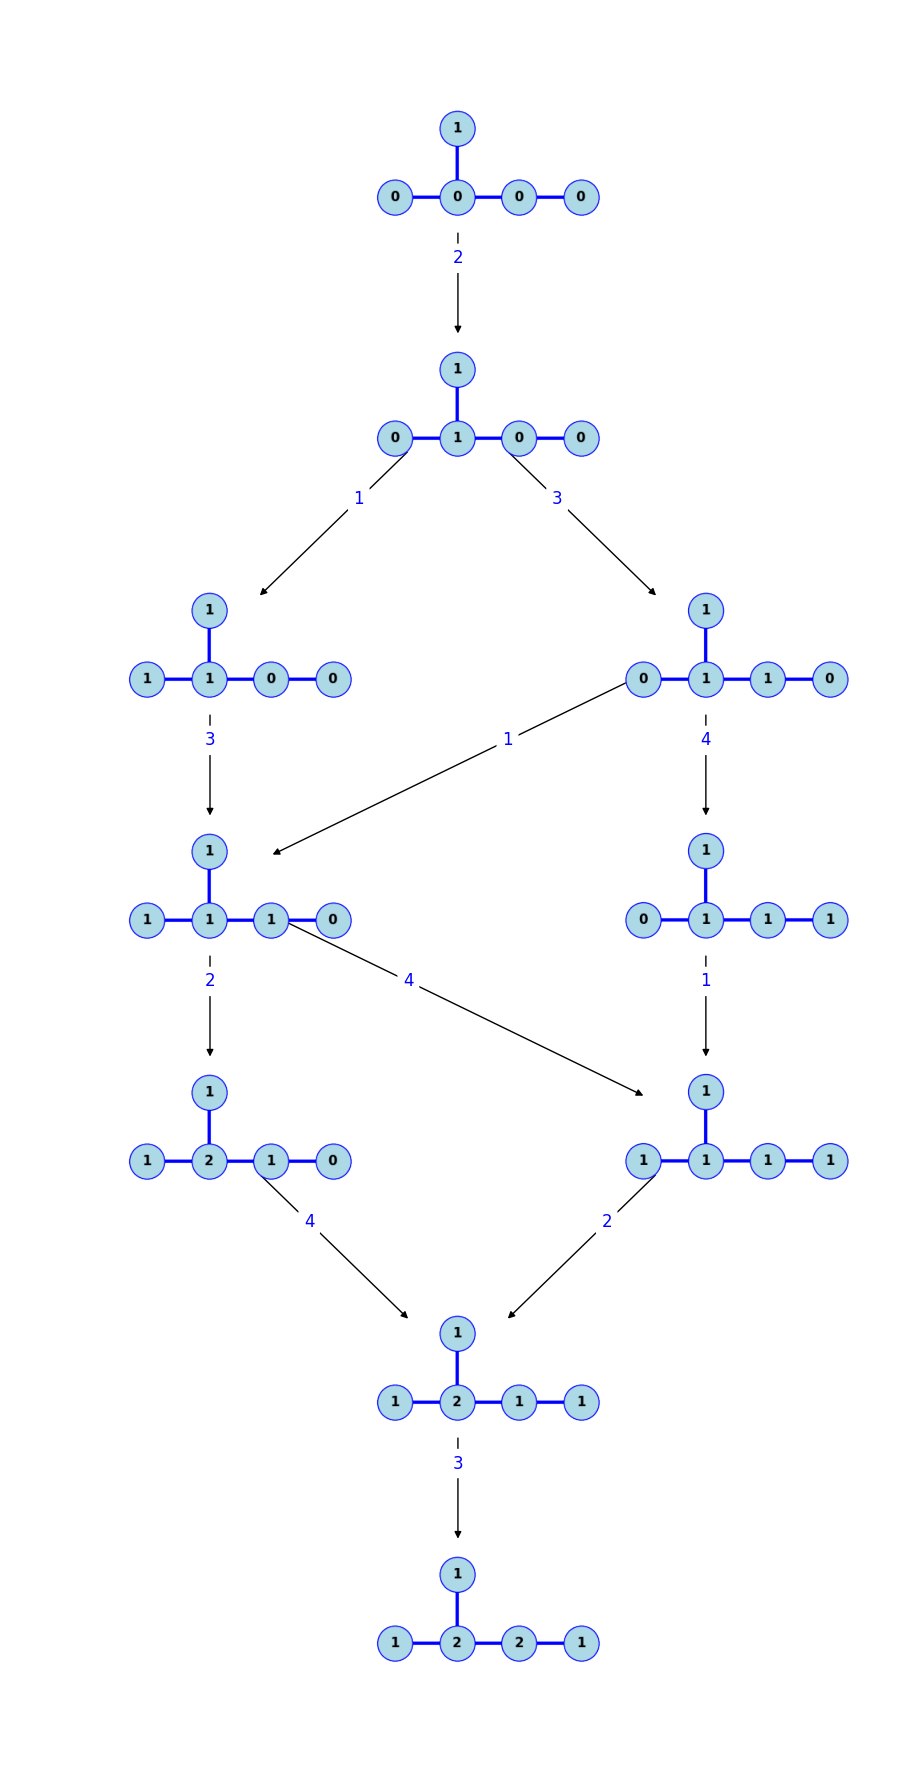

There are 5 alternative paths: [[2, 1, 3, 2, 4, 3], [2, 1, 3, 4, 2, 3], [2, 3, 1, 2, 4, 3], [2, 3, 1, 4, 2, 3], [2, 3, 4, 1, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  1\right)$

<h1><center><strong>Weights</strong></center></h1>

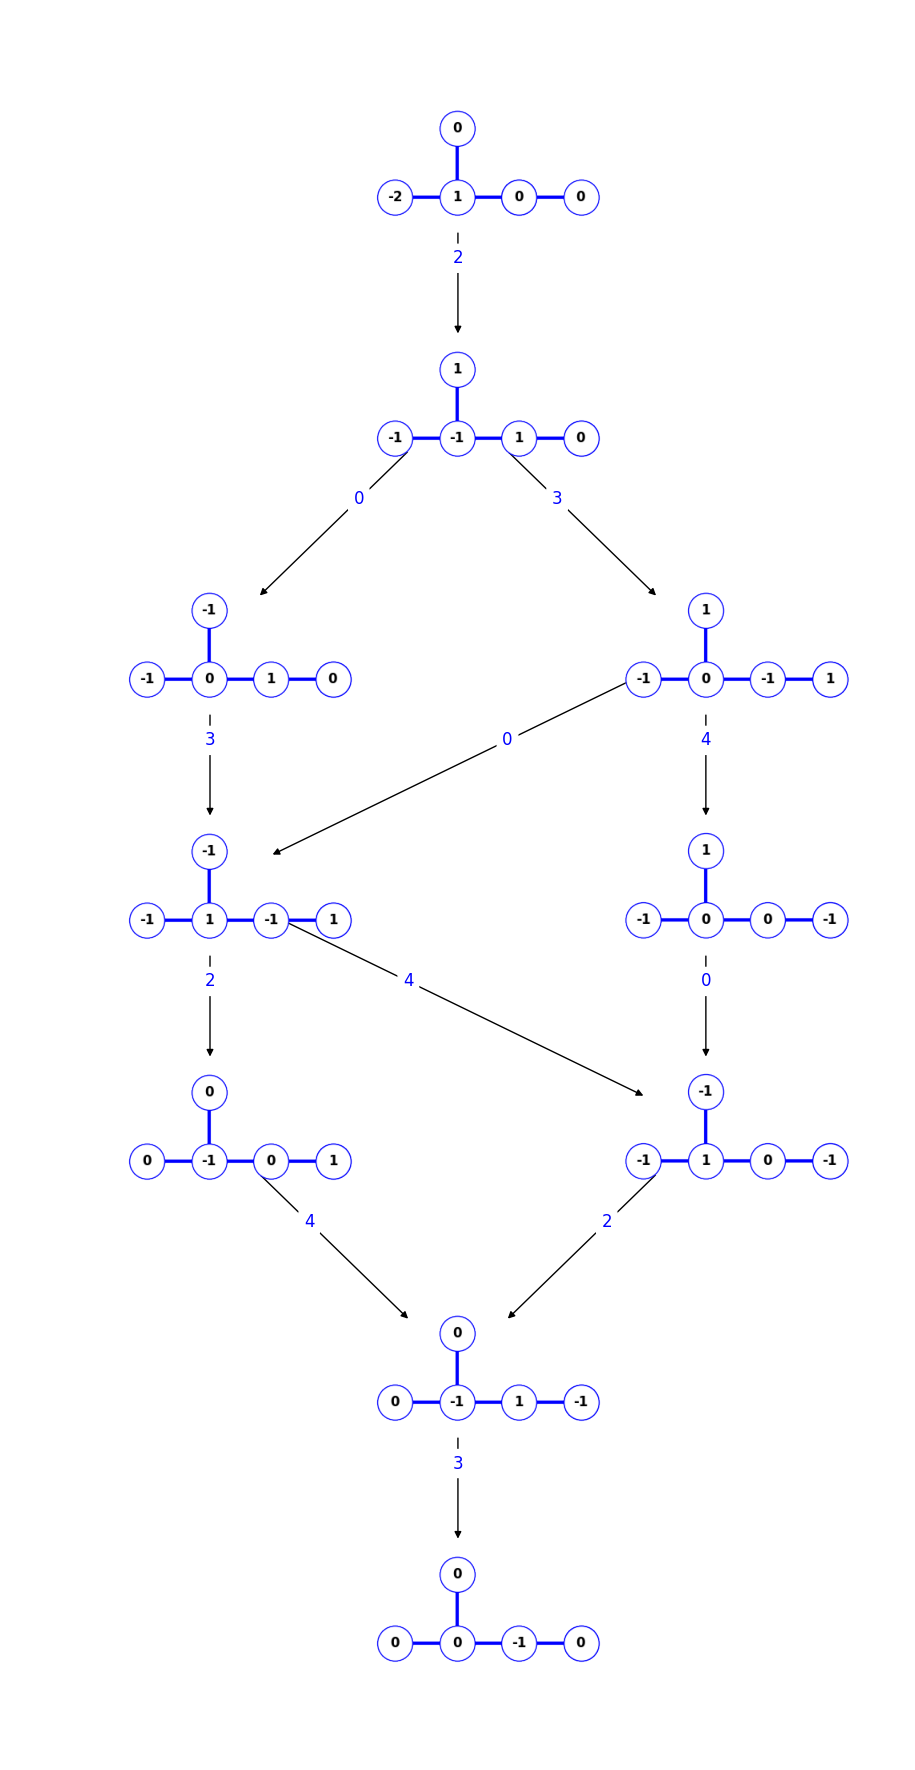

<h1><center><strong>Population</strong></center></h1>

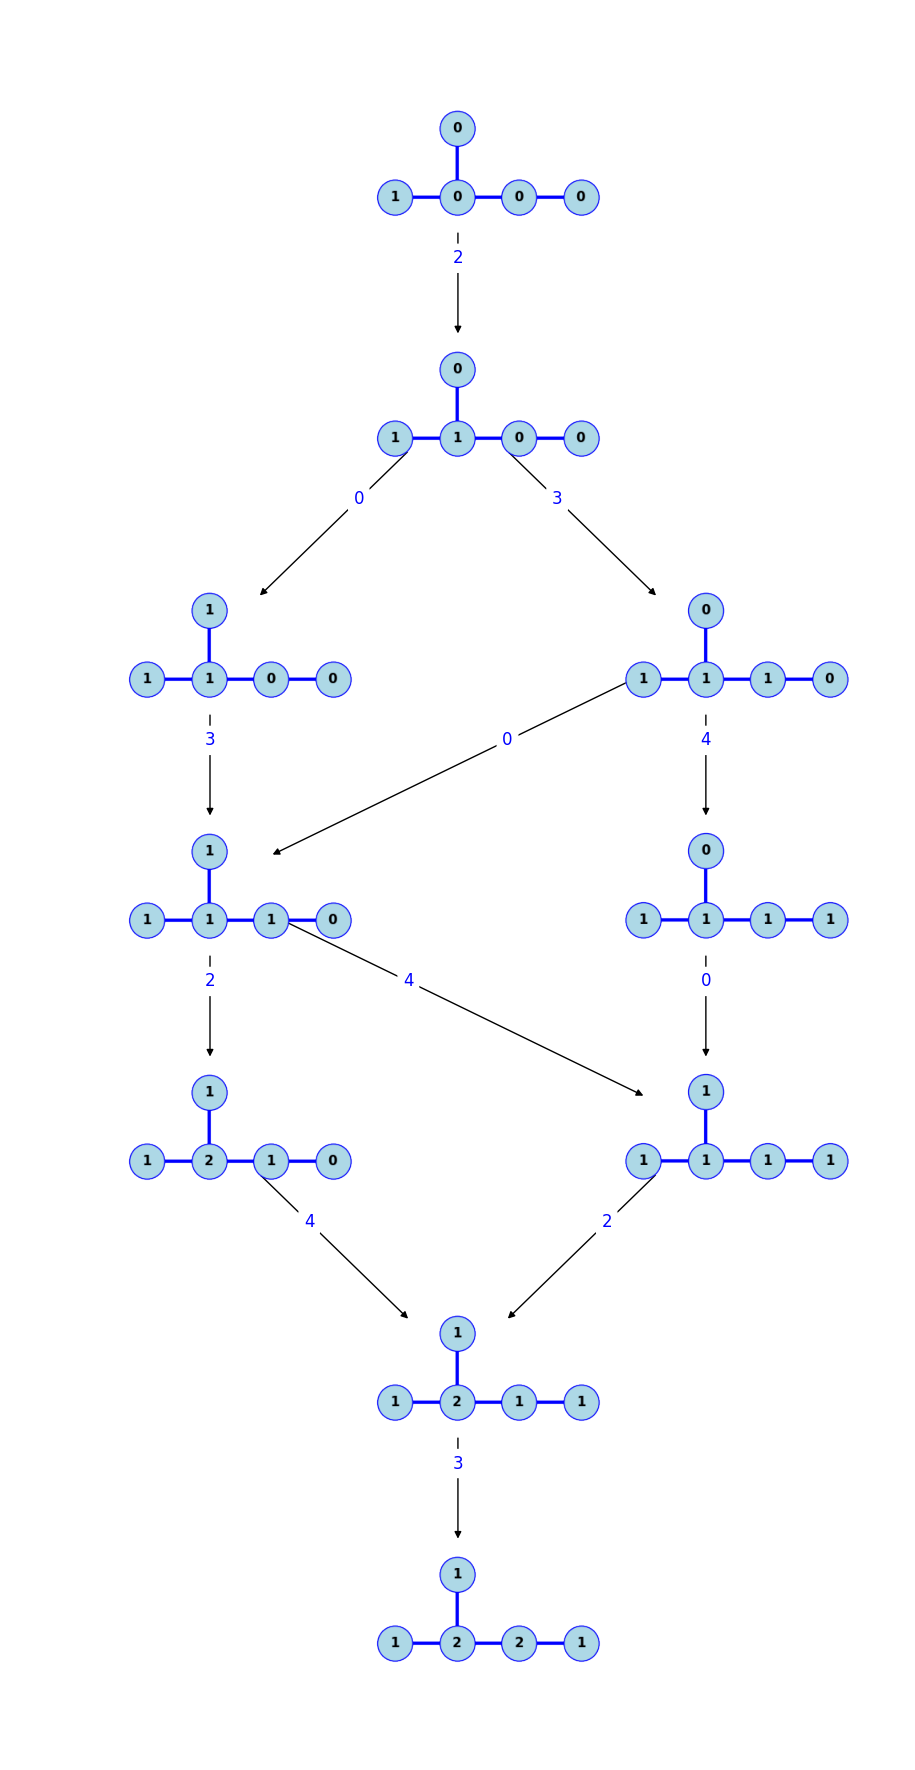

There are 5 alternative paths: [[2, 0, 3, 2, 4, 3], [2, 0, 3, 4, 2, 3], [2, 3, 0, 2, 4, 3], [2, 3, 0, 4, 2, 3], [2, 3, 4, 0, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  2\right)$

<h1><center><strong>Weights</strong></center></h1>

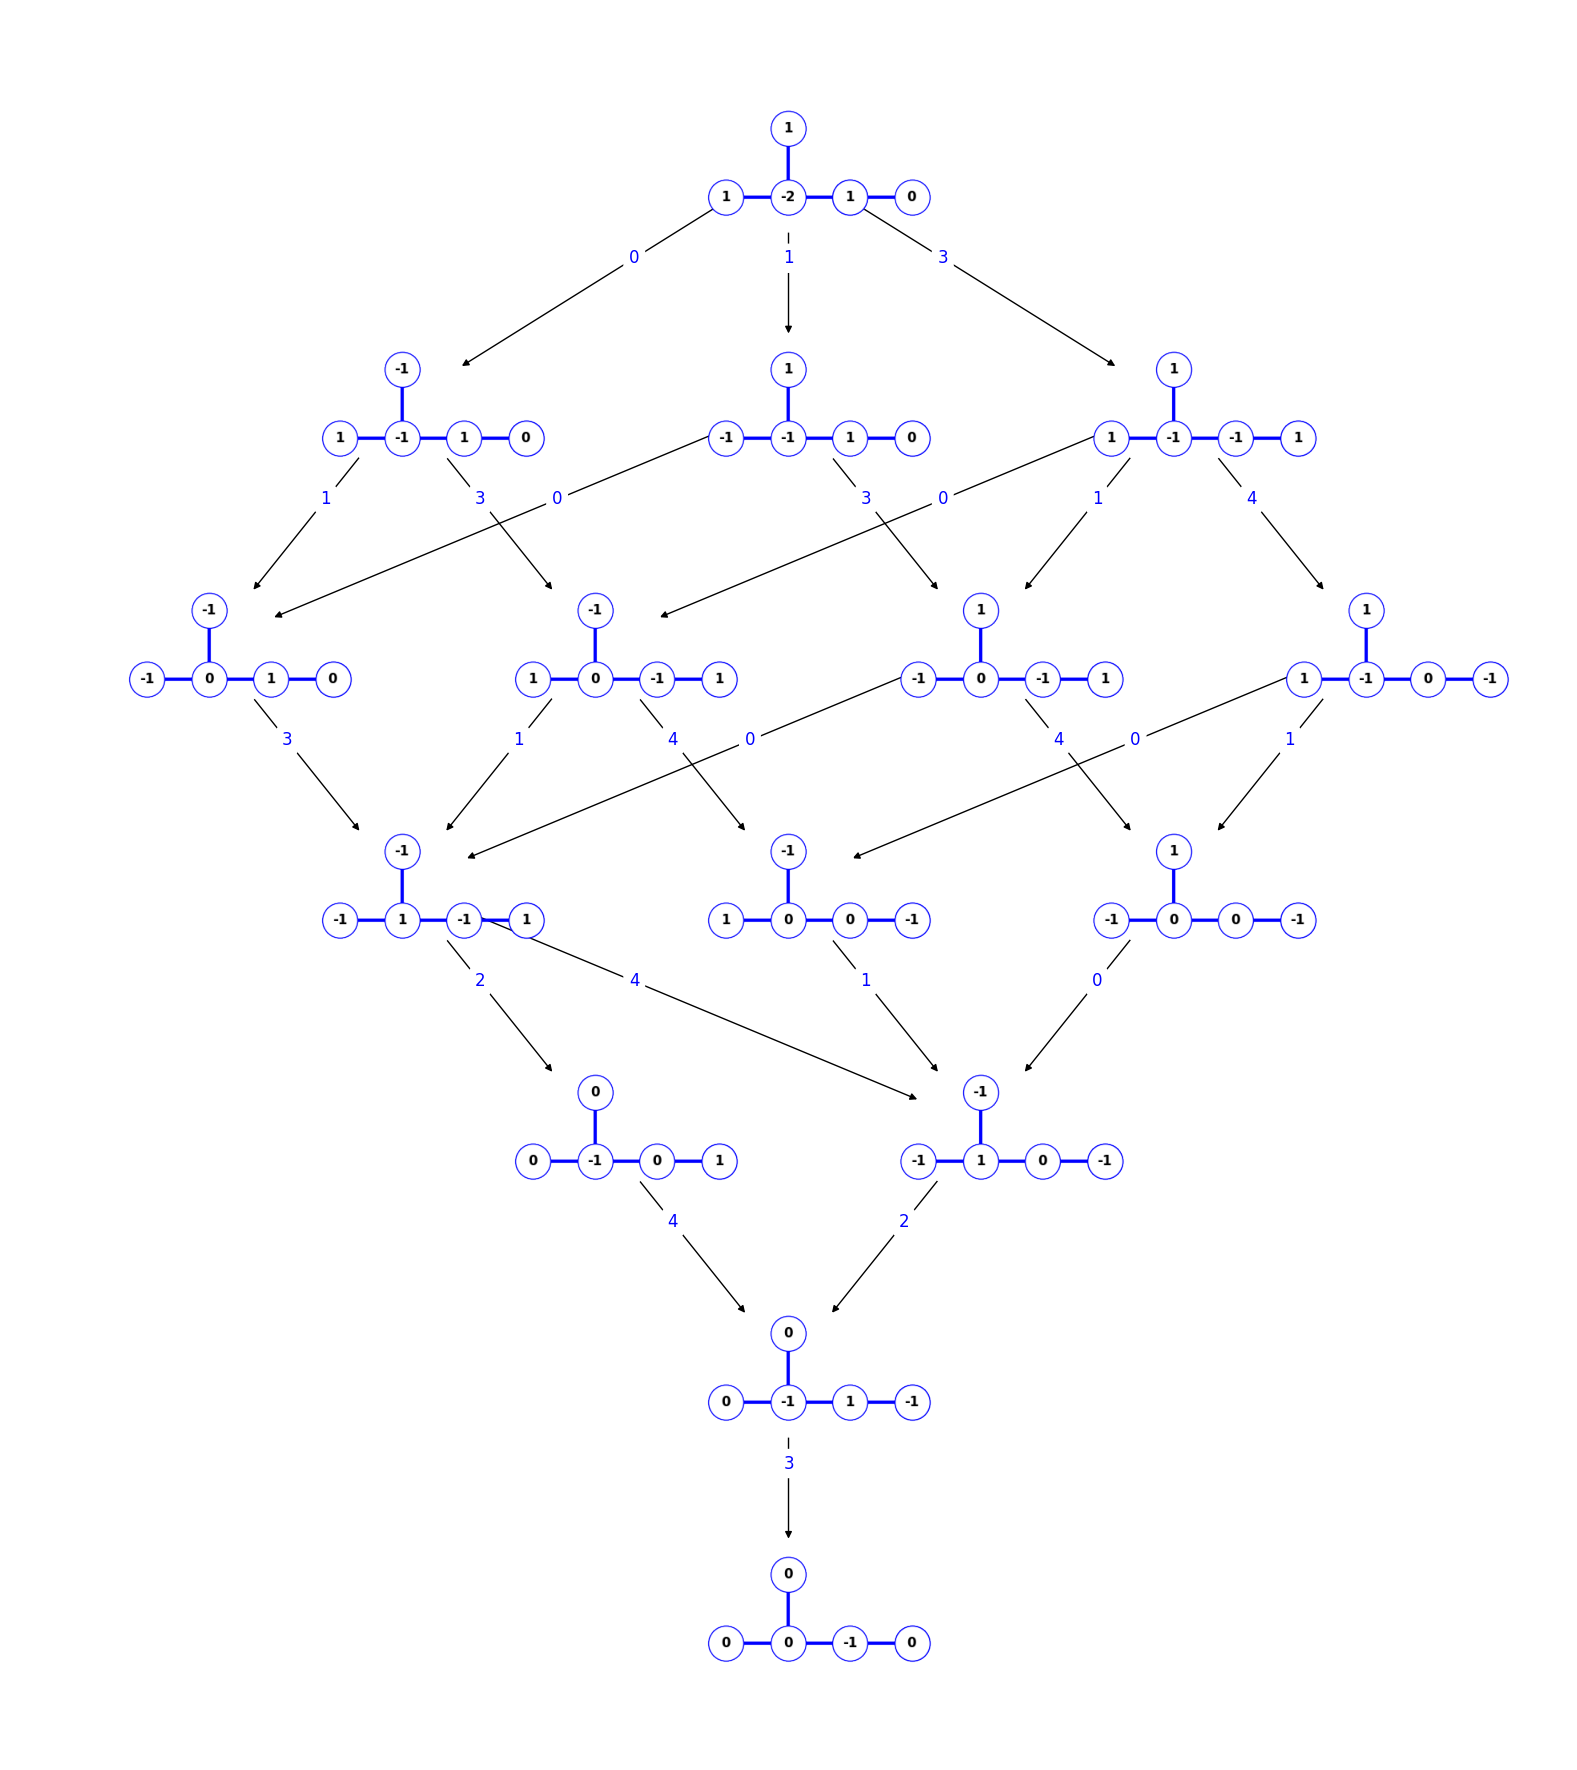

<h1><center><strong>Population</strong></center></h1>

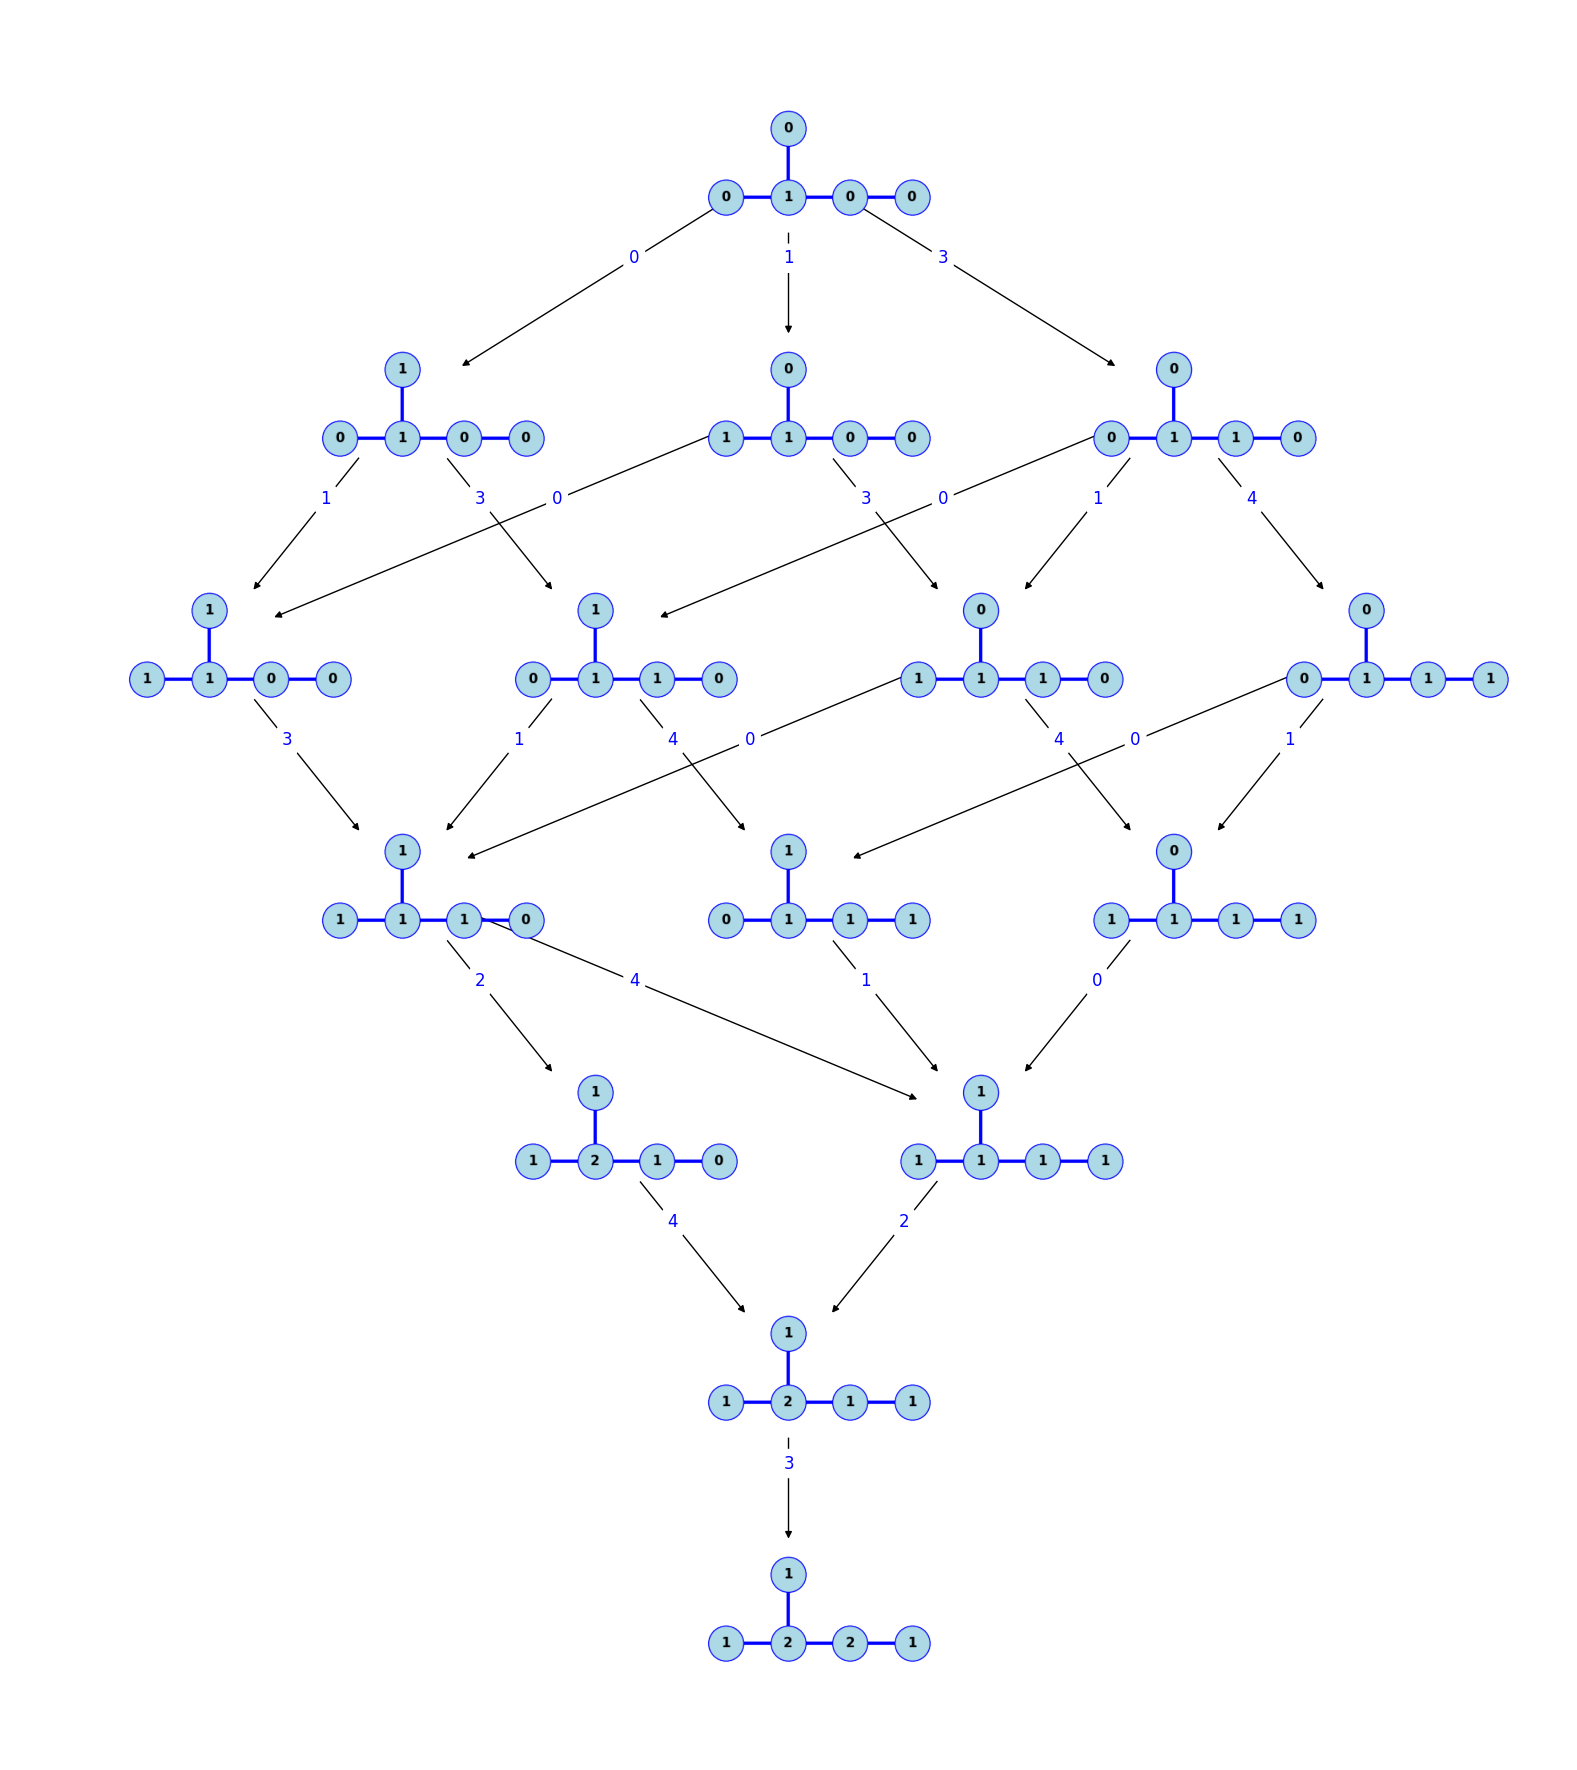

There are 18 alternative paths: [[0, 1, 3, 2, 4, 3], [0, 1, 3, 4, 2, 3], [0, 3, 1, 2, 4, 3], [0, 3, 1, 4, 2, 3], [0, 3, 4, 1, 2, 3], [1, 0, 3, 2, 4, 3], [1, 0, 3, 4, 2, 3], [1, 3, 0, 2, 4, 3], [1, 3, 0, 4, 2, 3], [1, 3, 4, 0, 2, 3], [3, 0, 1, 2, 4, 3], [3, 0, 1, 4, 2, 3], [3, 0, 4, 1, 2, 3], [3, 1, 0, 2, 4, 3], [3, 1, 0, 4, 2, 3], [3, 1, 4, 0, 2, 3], [3, 4, 0, 1, 2, 3], [3, 4, 1, 0, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  3\right)$

<h1><center><strong>Weights</strong></center></h1>

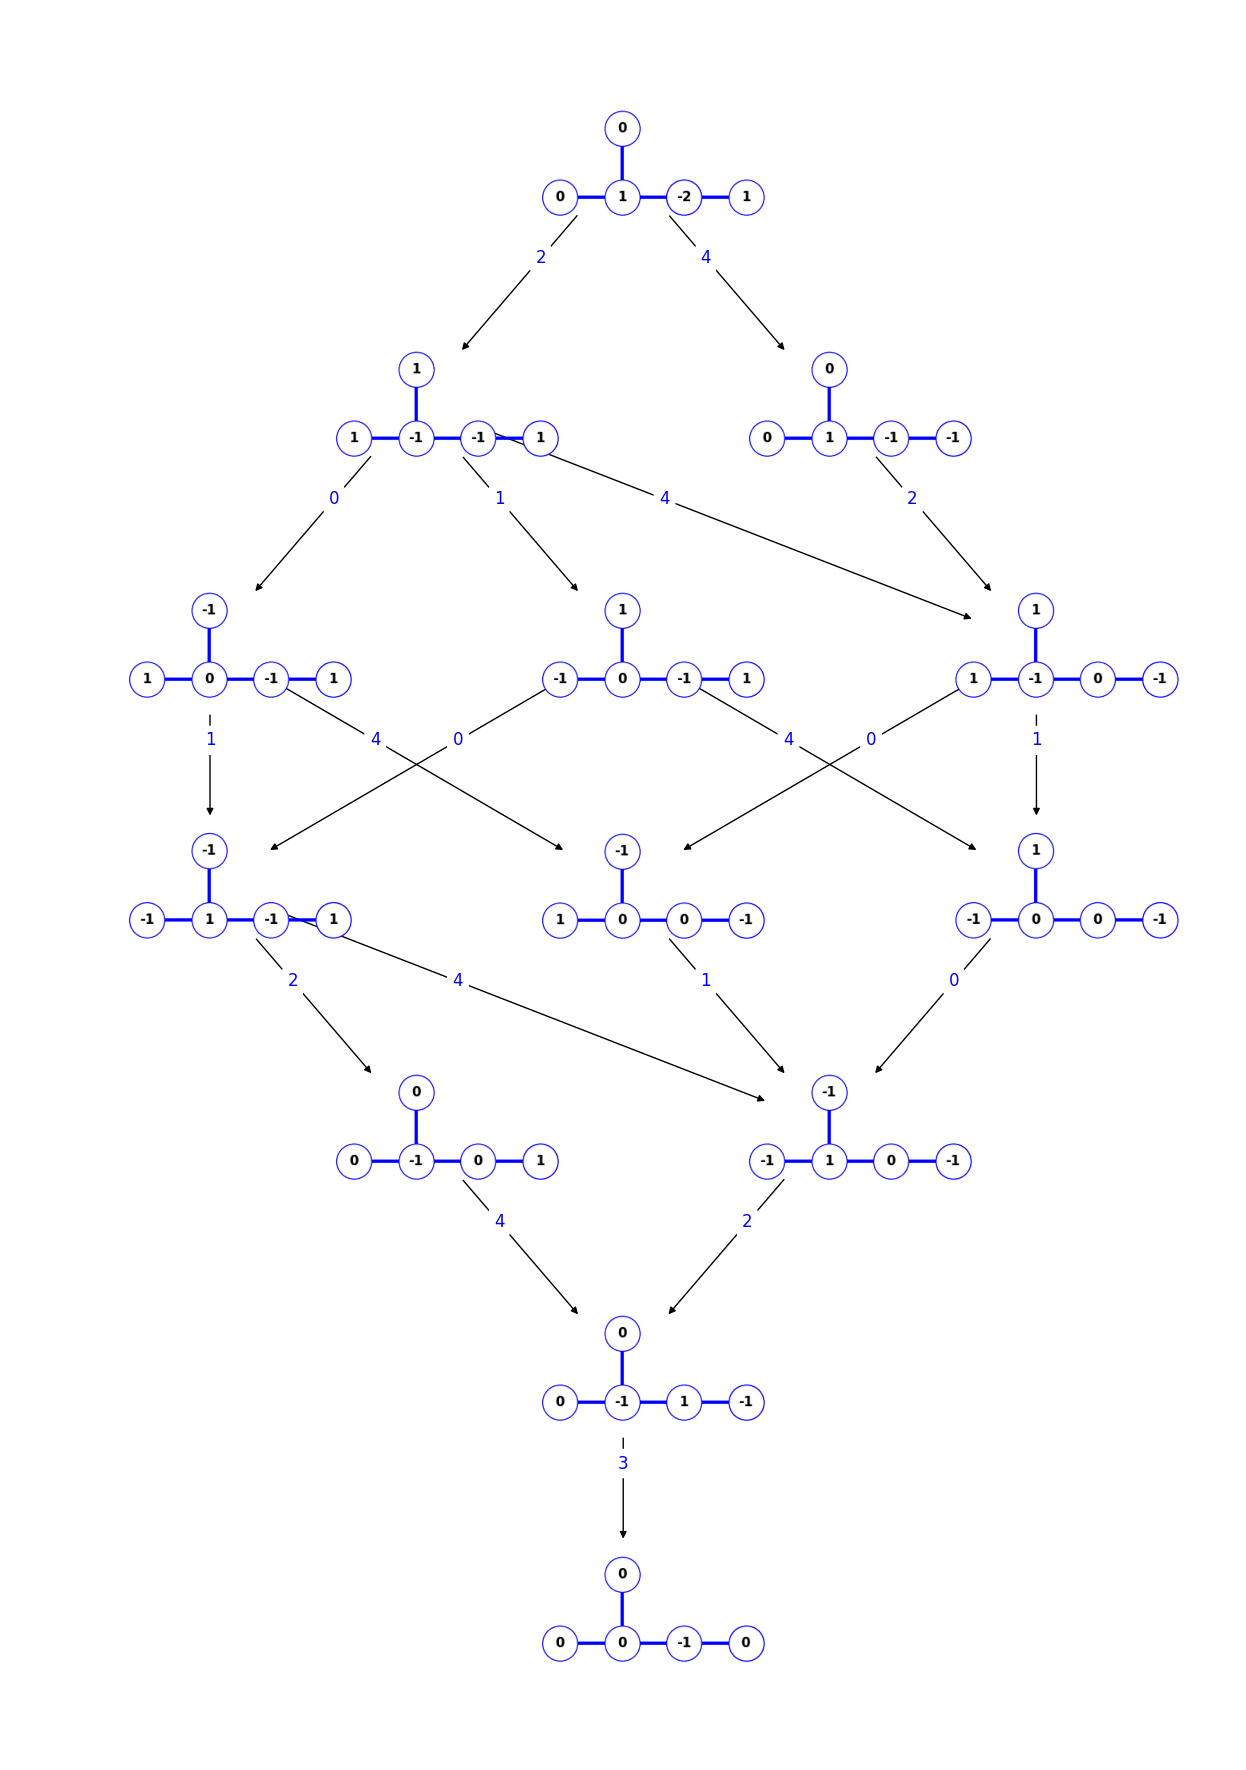

<h1><center><strong>Population</strong></center></h1>

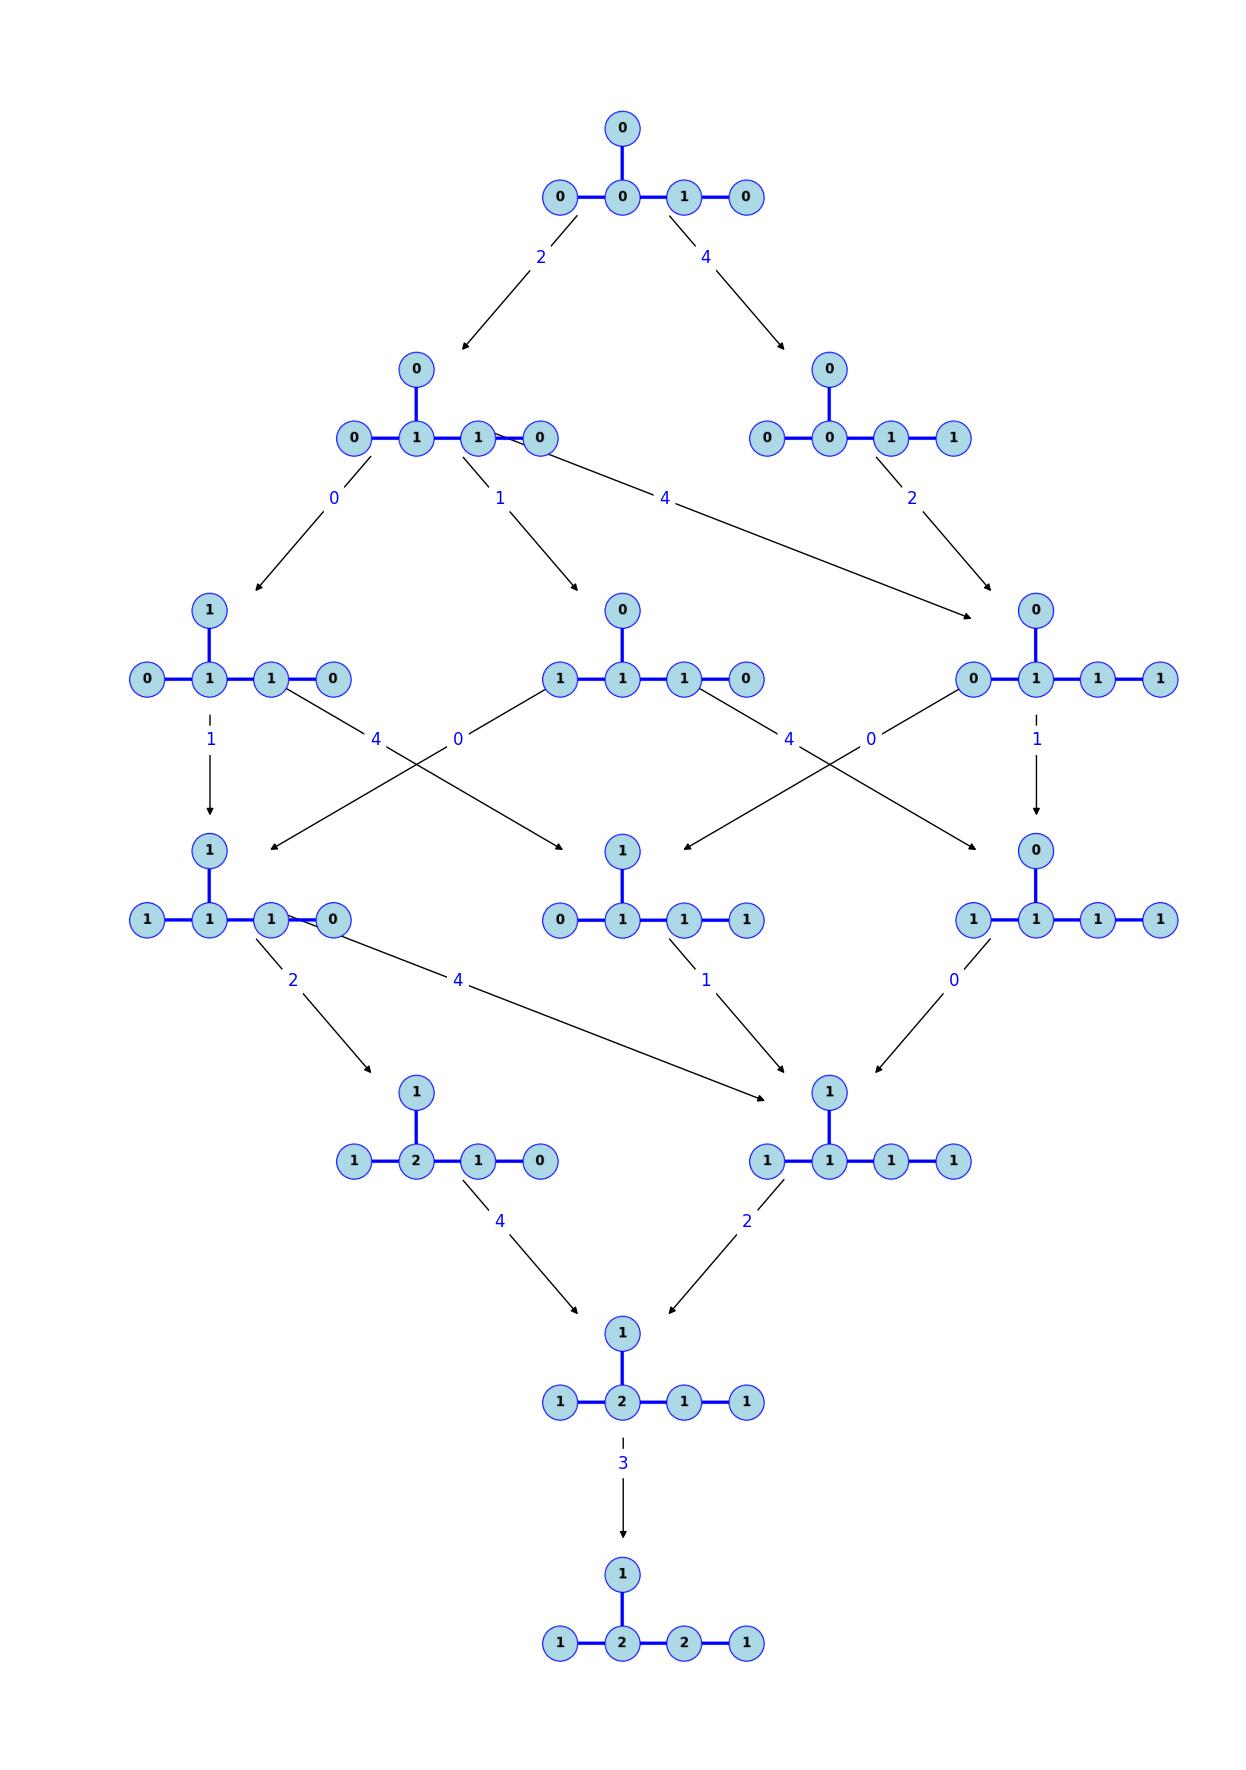

There are 10 alternative paths: [[2, 0, 1, 2, 4, 3], [2, 0, 1, 4, 2, 3], [2, 0, 4, 1, 2, 3], [2, 1, 0, 2, 4, 3], [2, 1, 0, 4, 2, 3], [2, 1, 4, 0, 2, 3], [2, 4, 0, 1, 2, 3], [2, 4, 1, 0, 2, 3], [4, 2, 0, 1, 2, 3], [4, 2, 1, 0, 2, 3]]





________________________________________

Working with $R^{+}$$\left( D_{5}, \  4\right)$

<h1><center><strong>Weights</strong></center></h1>

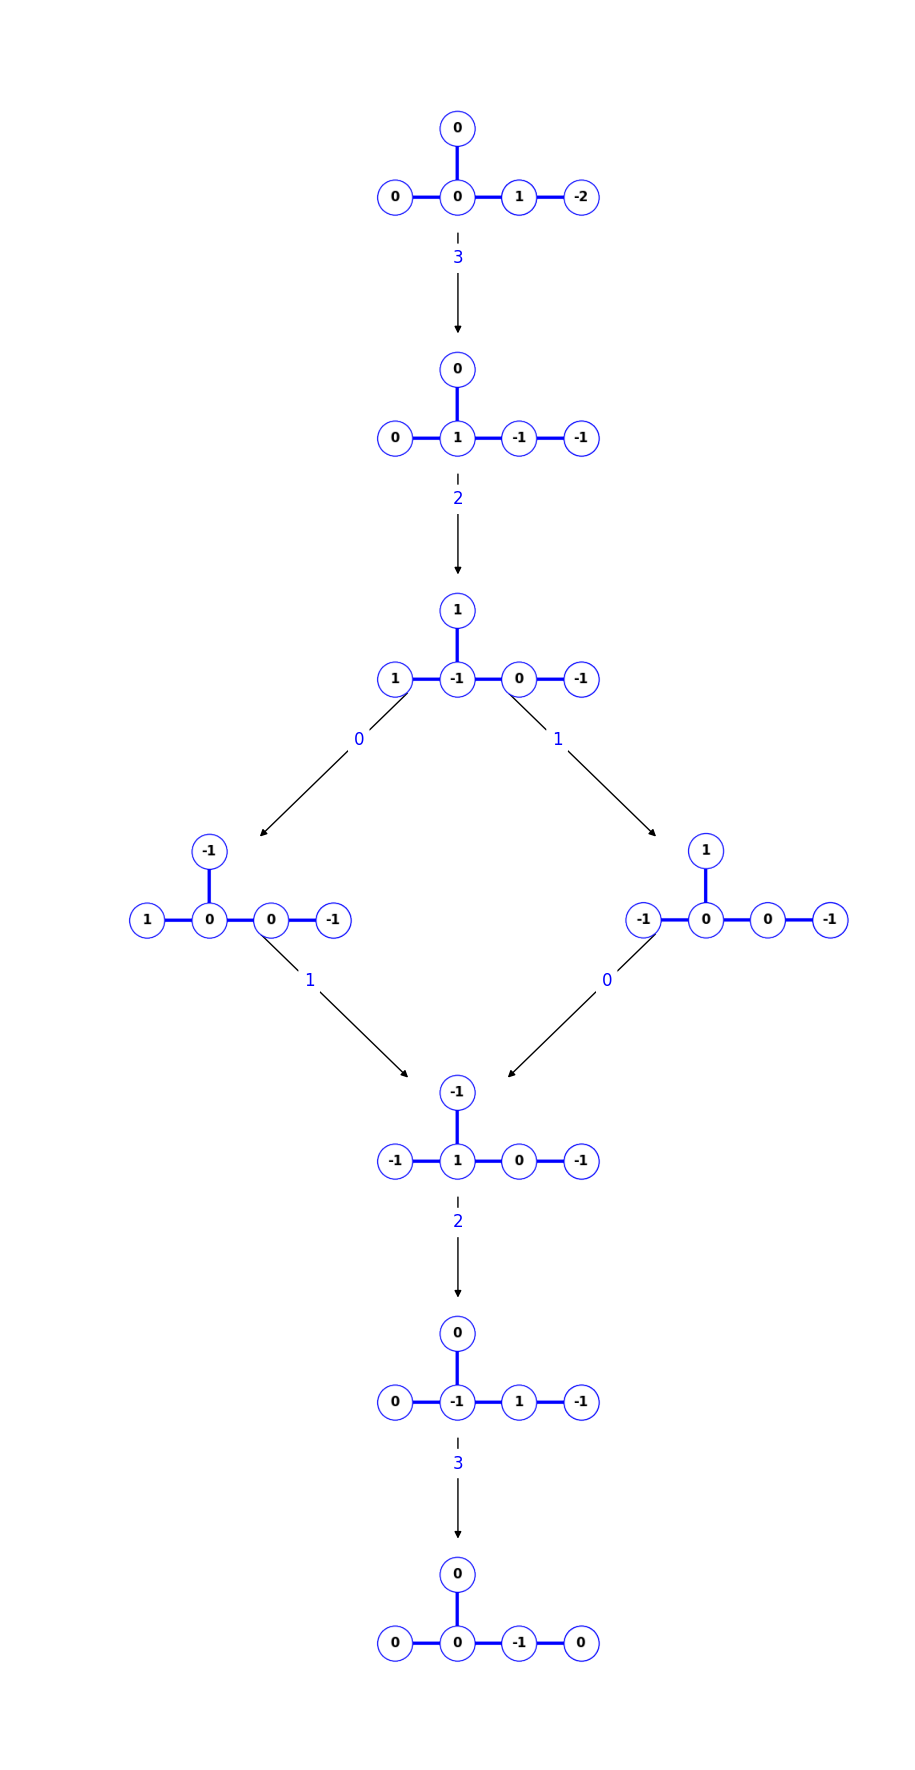

<h1><center><strong>Population</strong></center></h1>

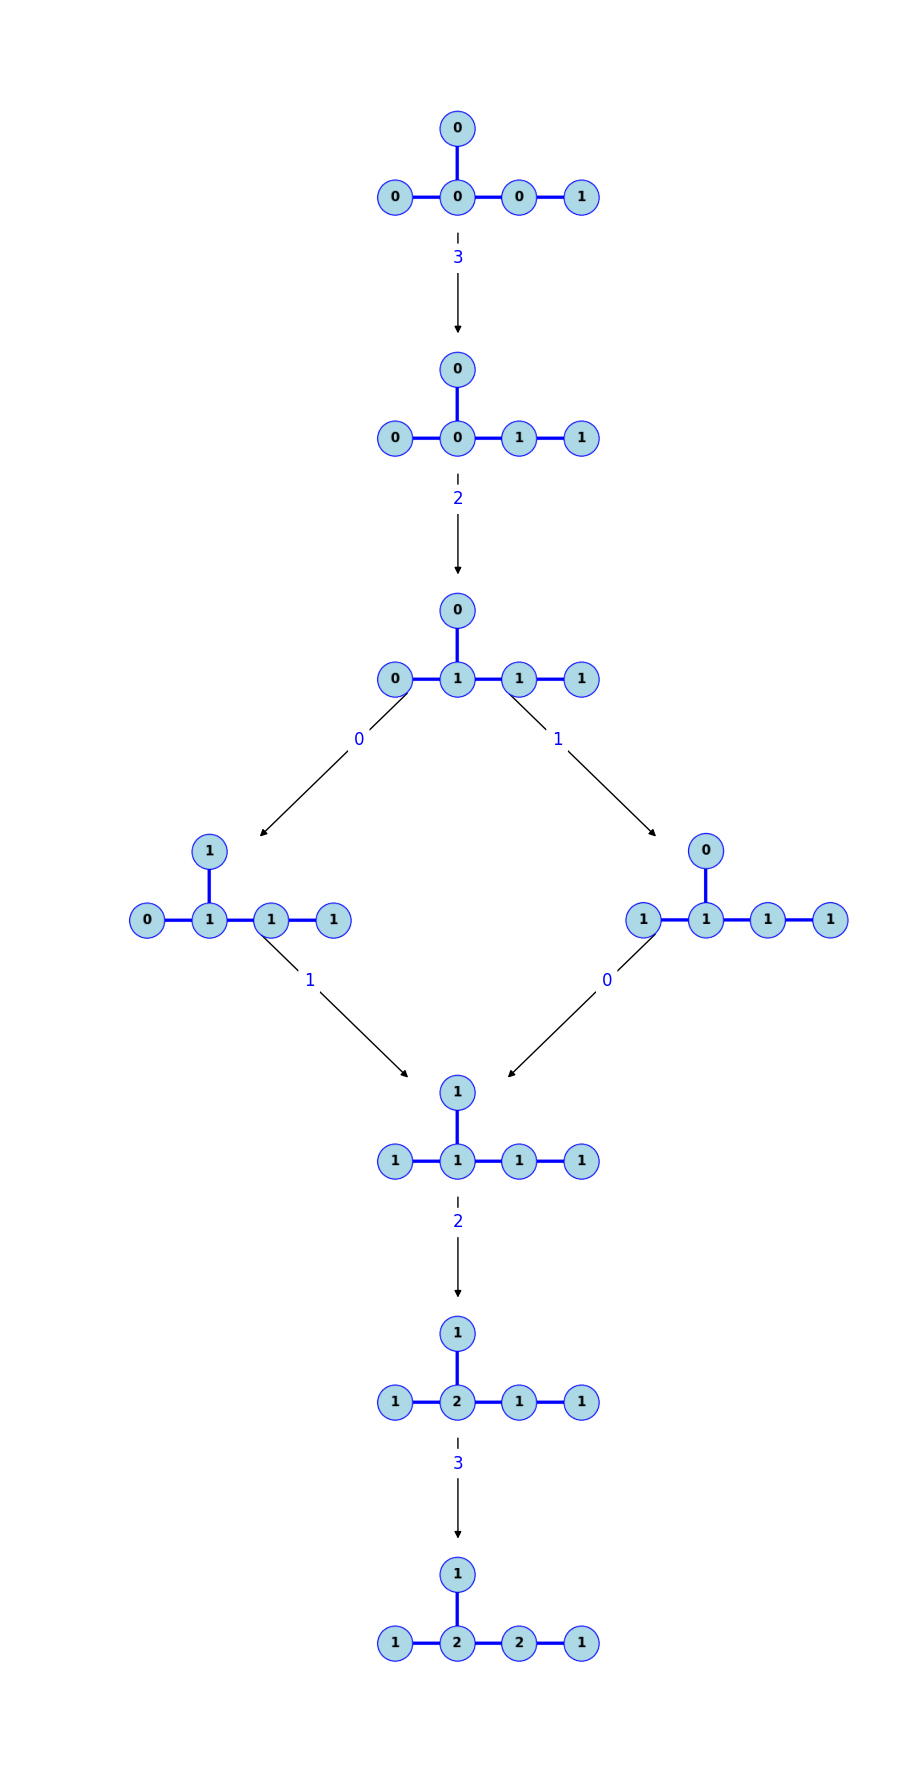

There are 2 alternative paths: [[3, 2, 0, 1, 2, 3], [3, 2, 1, 0, 2, 3]]


In [ ]:
# the following code generated the previous graphs
# Exersice from N. Wildberger, Dynamics on Graphs 14 | Entering the remarkable world of E6 via mutation posets | Wild Egg Maths
# at https://www.patreon.com/posts/dynamics-on-14-73381024
from sympy import *
import matplotlib.pyplot as plt, networkx as nx, PIL, os
from matplotlib.pyplot import figure, text
from matplotlib import patches
from IPython.display import display, Markdown, Math



init_session(use_latex=True)

%matplotlib inline
#%matplotlib notebook

def get_img(population, color = 'lightblue'): # creates an image of the current population's state
    tmp = "tmp12345.png" # temp file
    plt.clf()
    plt.xlim((-0.1,1.15))
    plt.ylim((.15,.6))
    fig = plt.gcf()
    fig.set_size_inches(5, 2)
    g = nx.Graph()
    for node in population:
        g.add_node(node, label = node)
    g.add_edge(0,2)
    for node in range(1, 4):
        g.add_edge(node, node+1)
    out = nx.draw(g, pos = [(.5,.5), (.25,.25), (.5,.25), (.75,.25), (1.0,.25)], 
                  with_labels=True, 
                  font_weight='bold',
                  labels = {k: population[k] for k in range(5)},
                  node_size=1000,
                  node_color = color,
                  edgecolors='blue',
                  edge_color='blue',
                  width = 3)
    plt.savefig(tmp, transparent=True) # temporal file
    plt.close()
    img = PIL.Image.open(tmp)
    return img # returns the image of the current population

def calc_weights(population, structure):
    return tuple([sum([population[col] * structure[col][row] for col in range(len(population))]) 
            for row in range(len(population))])

def increase(population, structure, length, poset, paths = [], path = []):
    weights = poset[tuple(population)]['weights']
    m = max(weights)
    if m <= 0:
        paths.append(path)
        return
    nodes = [k for k in range(length) if weights[k] == m]
    parent = tuple(population)
    for node in nodes:
        population[node] += m
        child = tuple(population)
        try:
            poset[child]['parents'].append((node, parent))
        except:
            poset[child] = {'parents': [(node, parent)], 'weights': calc_weights(child, structure)}
        increase(population, structure, length, poset, paths, path+[node])
        population[node] -= m

def introduce(n):
    display(
            Markdown(
                    '\n\n\n________________________________________\n\n'+\
                    'Working with {}{}'.format(latex(Symbol('R^+'), mode='inline'),
                                               latex((Symbol('D_5'), n), mode='inline')))
            )
    
def get_graph_edge_labels(poset):
    g = nx.DiGraph()
    edge_labels = {}
    for node in poset:
        g.add_node(node, label = node, size = 1000, image=get_img(node), weightimg=get_img(poset[node]['weights'], 'white'))
        for label, parent in poset[node]['parents']:
            g.add_edge(parent, node)
            edge_labels[(parent, node)] = label
    # For visualization purposes, layout the nodes in topological order
    for i, layer in enumerate(nx.topological_generations(g)):
        for n in layer:
            g.nodes[n]["layer"] = i
    return g, edge_labels

def get_pos_height_width(g):
    pos = nx.multipartite_layout(g, subset_key="layer", align="horizontal")
    height = len(set([y for _, y in list(pos.values())]))
    width = len(set([x for x, _ in list(pos.values())]))
    # Flip the layout so the root node is on top
    for k in pos:
        pos[k][-1] *= -height
        pos[k][-2] *= -width
    return pos, height, width

def show_graph(g, pos, width, height, node_size, weight = False):
    figure(figsize=(width*2, height*5/2))
    nx.draw(g, pos=pos, node_color='white', node_size = node_size)
    nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels, font_color='blue', 
                                 label_pos=.6, font_size=12, rotate=False)
    ax=plt.gca()
    fig=plt.gcf()
    trans = ax.transData.transform
    trans2 = fig.transFigure.inverted().transform
    imsize = 2/(width) # this is the image size
    for n in g.nodes():
        (x,y) = pos[n]
        xx,yy = trans((x,y)) # figure coordinates
        xa,ya = trans2((xx,yy)) # axes coordinates
        a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
        if weight:
            a.imshow(g.nodes[n]['weightimg'])
        else:
            a.imshow(g.nodes[n]['image'])
        a.set_aspect('equal')
        a.axis('off')
    if weight:
        display(Markdown('<h1><center><strong>{}</strong></center></h1>'.format('Weights')))
    else:
        display(Markdown('<h1><center><strong>{}</strong></center></h1>'.format('Population')))
    plt.show()
    plt.close()
    

structure = [[-2,  0,  1,  0,  0],
             [ 0, -2,  1,  0,  0],
             [ 1,  1, -2,  1,  0],
             [ 0,  0,  1, -2,  1],
             [ 0,  0,  0,  1, -2]]

length = len(structure[0])


for k in range(length):
    population = [0] * length
    population[k] = 1
    introduce(k)
    root = tuple(population)
    poset = {root:{'parents': [], 'weights': calc_weights(root, structure)}}
    paths = []
    increase(population, structure, length, poset, paths)
    g, edge_labels = get_graph_edge_labels(poset)
    pos, height, width = get_pos_height_width(g)
    show_graph(g, pos, width, height, node_size = 10000, weight = True)
    show_graph(g, pos, width, height, node_size = 10000, weight = False)
    print('There are', len(paths),'alternative paths:', paths)